# Bike-Sharing Provider

## Multiple Linear Regression

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.The company is finding it very difficult to sustain in the current market scenario.
A US bike-sharing provider BoomBikes trying to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.BoomBikers consulting company tryingto understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

        1-Which variables are significant in predicting the demand for shared bikes.
        2-How well those variables describe the bike demands

### Approach:
We are concerned about determining the driver variable for unnderstanding the bike demand in future. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

The potential reasons for the demand going down is people not alowed to go out during Covid-19.<br>

The potential reasons could be:
1. Decline in the number of people coming out in city.
2. Fewer people can only go out.
3. Bad Weather condition


### Data
We have been given data for the period of 1 JAN 2018 to 31 DEC 2019.<br>
With Columns as<br> 
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week(0-sunday...6-saturday)
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [186]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [187]:
pwd

'/Users/vikashkumarsingh/Documents/IIIT Assignment/Linear Regression'

## Reading,Quality Check and Understanding The Data

In [188]:
#Importing dataset from CSV file day.csv
sh_bike = pd.DataFrame(pd.read_csv('day.csv'))
sh_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [190]:
#check the number of rows and columns
sh_bike.shape

(730, 16)

In [191]:
#check all the numeric columns summary in the dataset
sh_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [192]:
# check the datatypes of each column
sh_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#So there are no missing value

## Data Understanding

### Find the categorical and continuous columns data
### Check the datatypes

## Covering Columns that need to be drop or dummified or continuous

#### 1. The "instant" is unique value column so not required becuse we will not able to use in my predictions.
#### Hence Drop  "instant" 
#### 2. The "dteday" redundant as same information we can get in "yr" and "mnth" and "Day". So not much used in predictions
#### Hence Drop "dteday"
#### 3. "season" (1:spring, 2:summer, 3:fall, 4:winter) is a categorical variable for dummification.
#### 4. "mnth" ( 1 to 12) is for dummification.
#### 5. "weathersit" a categorical variable with 4 levels describing the actual weather which is going to affect the demand.
#### - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#### - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#### - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#### - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#### So "weathersit" for dummification
#### 6. a continuous variable are "hum" ,"windspeed","casual"
#### 7. "windspeed" - a continuous variable
#### 8. "casual" and "registered" are directly co-related to "cnt". once the model is built we may not feed this data to the
#### model as they are part of the target variable that needs to be predicted. You can only build a model to predict "casual"
#### riders or build a model to predict the "registered" riders or the "cnt" and not all together.
#### If we use them in the model then it may return highly overfitted model.you may get R2 or adjusted R2
#### around 1 which is wrong. Hence, it is advisable to drop these variables before building the model.

# Data Preperation
#### a. Drop instant(unique), dteday (redundant), casual and registered as these are part of count (cnt = casual+registered)
#### b. Map all known binary categorical columns to thier original values
#### c. Create dummies for all the know binary categorical columns. number od dummies is n-1

In [193]:
# Drop instant, dteday, casual, registered and atemp
sh_bike=sh_bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)

In [194]:
# check the data again
sh_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [195]:
#Mapp the variables season, month, weathersit, weekday to thier actual values before their dummification.
sh_bike.season = sh_bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
sh_bike.mnth = sh_bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
sh_bike.weekday = sh_bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
sh_bike.weathersit = sh_bike.weathersit.map({1:'Clear',2:'Misty_Cloudy',3:'Light_Snow_Rain',4:'Heavy_Snow_Rain'})

In [197]:
# check the datatypes of each column
sh_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


# Detail Data Analysis(DDA)

In [198]:
num_vars=['temp', 'hum', 'windspeed', 'cnt']

#### Study the Continuous and Categorical Features by checking the number of unique values in the columns

In [199]:
sh_bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
cnt           695
dtype: int64

#### We can consider the features with higher count (probably > 50) as the numerical calumns.

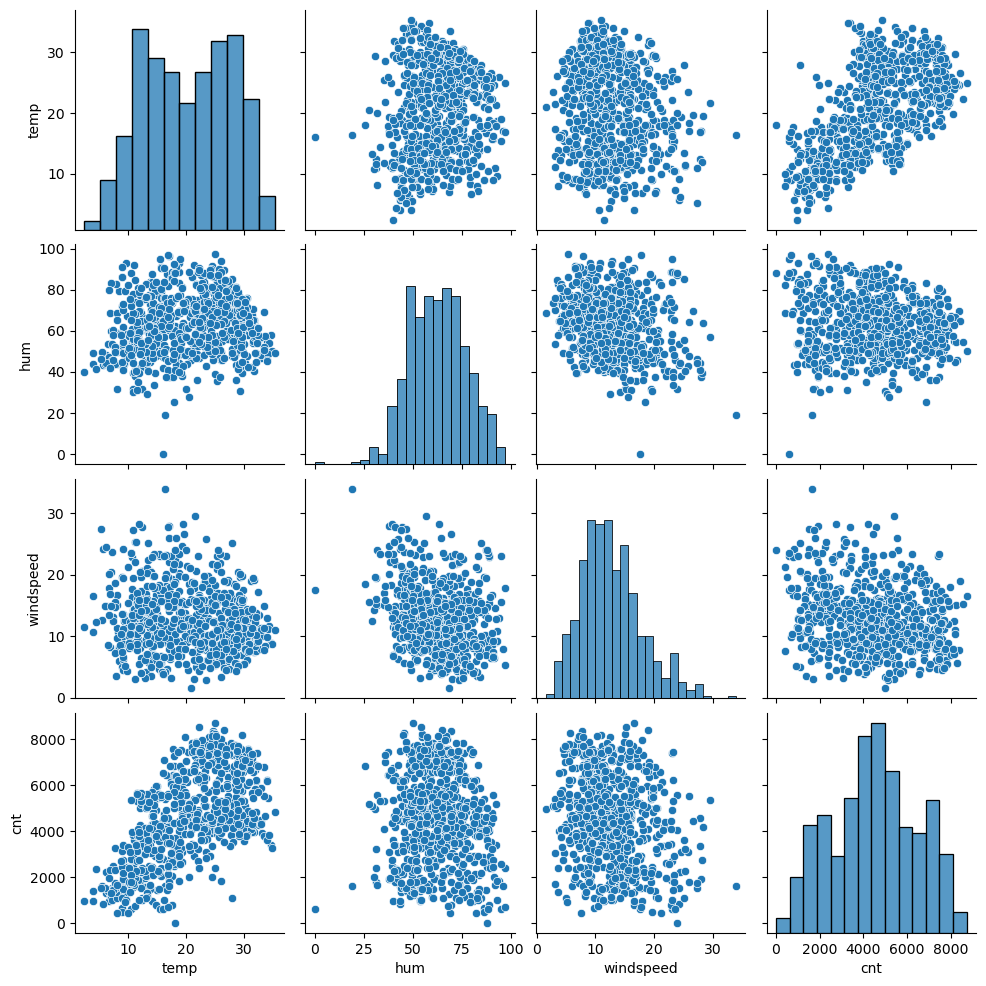

In [200]:
#Pairplot the numeric variables to visualise the correlation to the target variable 'cnt'.
sns.pairplot(sh_bike, vars=['temp', 'hum', 'windspeed', 'cnt'])
plt.show()

##### Analysing the plots above, we observe that there are few independent variables that seem to be positively correlated to the target variable "cnt".
##### Bike rental counts (cnt) looks correlated to the temperature "temp"

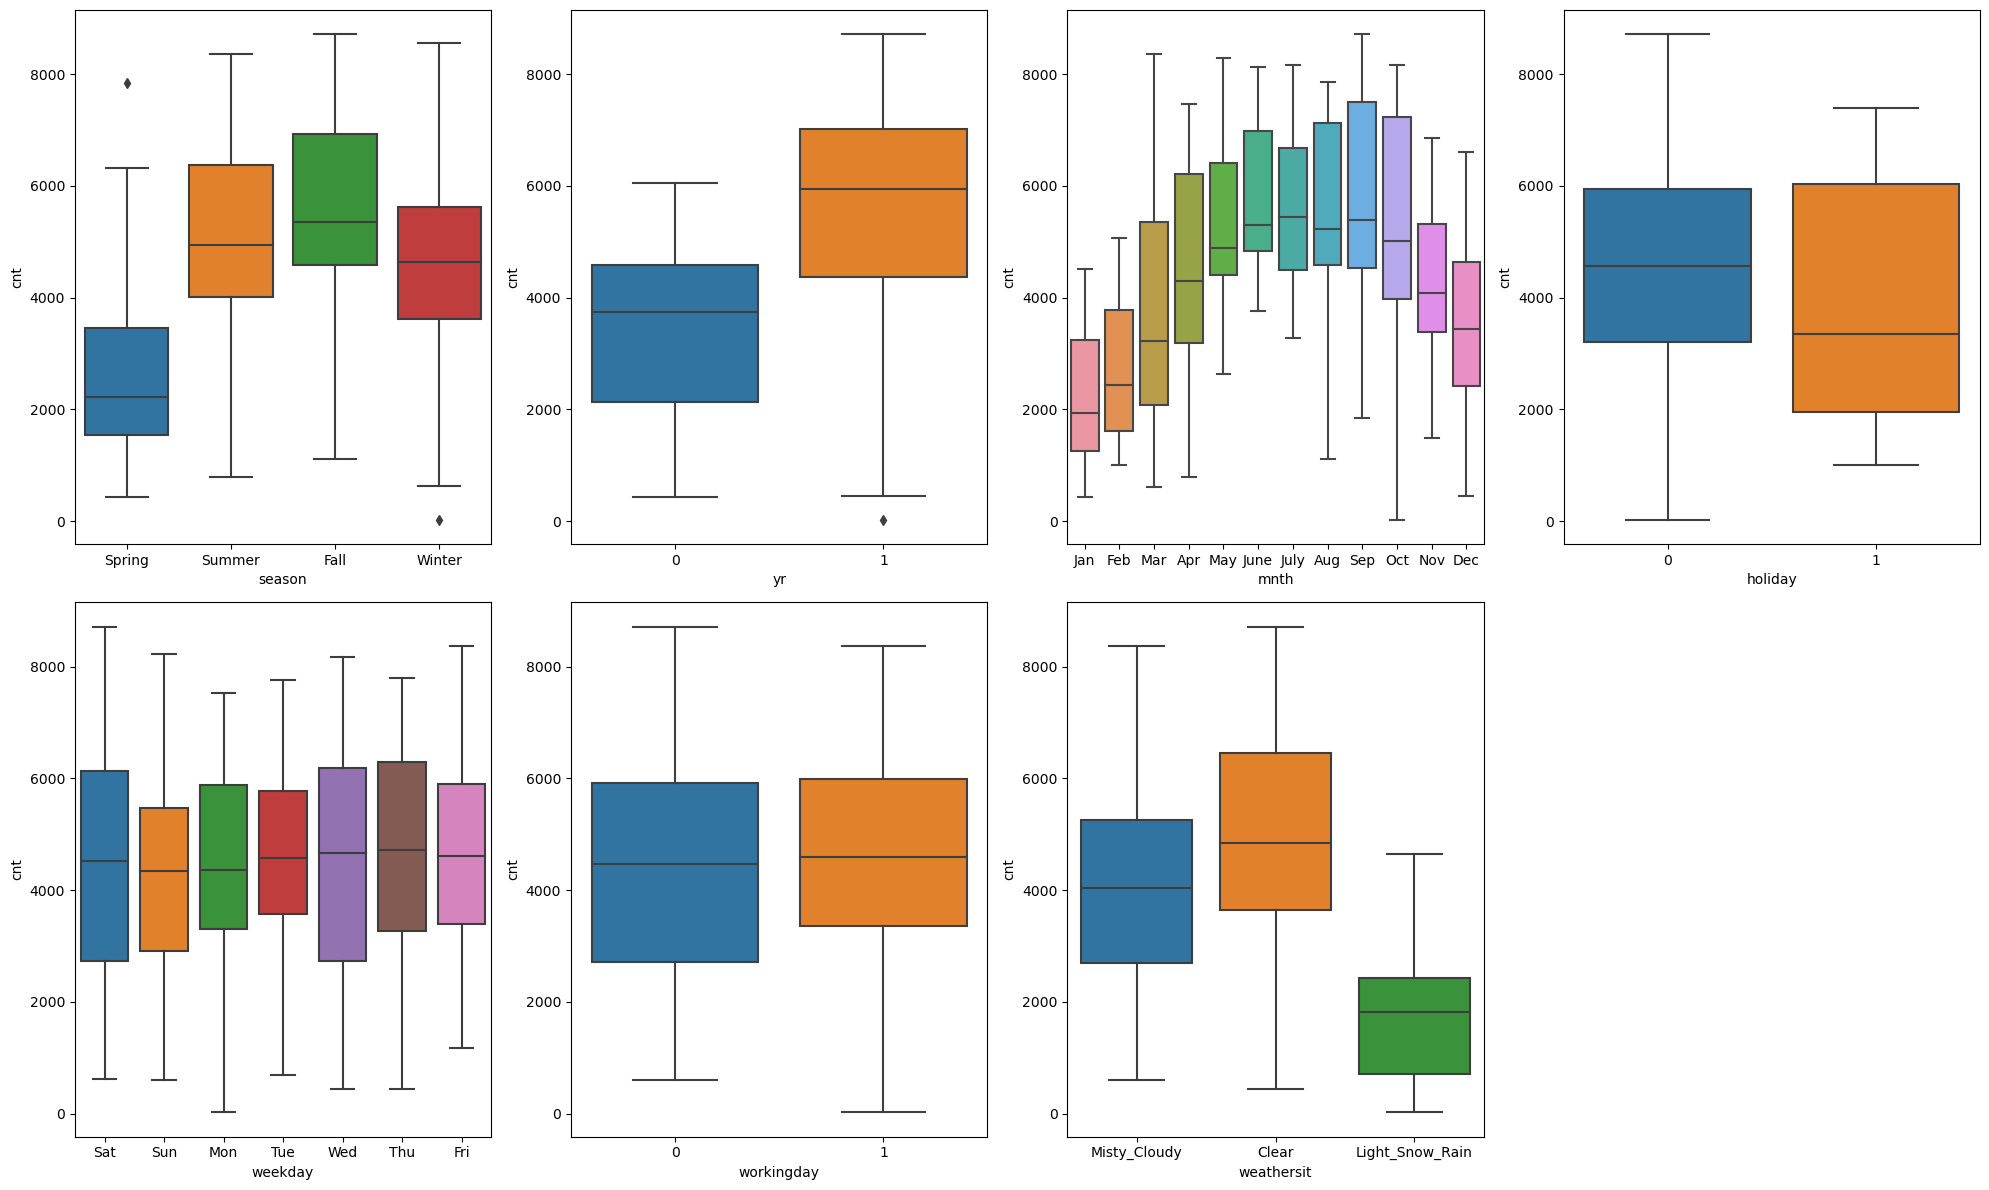

In [201]:
# Visualising the categorical variables through a boxplot
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = sh_bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = sh_bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = sh_bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = sh_bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = sh_bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = sh_bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = sh_bike)
plt.tight_layout()
plt.show()

### lets analyse plots of the categorical variables against the target variable
#### Season Vs Count

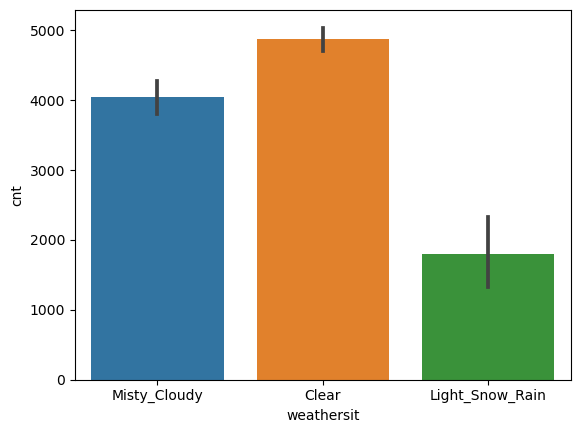

In [202]:
# Between season and count
sns.barplot(data=sh_bike, x='weathersit',y='cnt')
plt.show()


#### Bike Rentals are more during Clear or partly cloudy weather
#### Year Vs Count

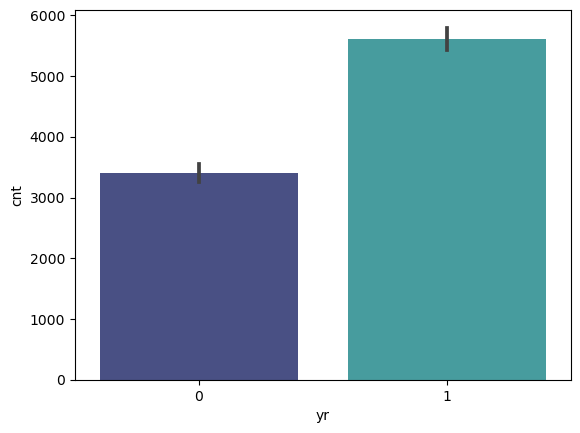

In [204]:
# Between year(0: 2018, 1:2019) and count
sns.barplot(data=sh_bike, x='yr',y='cnt',palette="mako")
plt.show()

In [ ]:
### Rental Bike Count was highere in 2019 then 2018
### Lets Check Seasion Vs Count

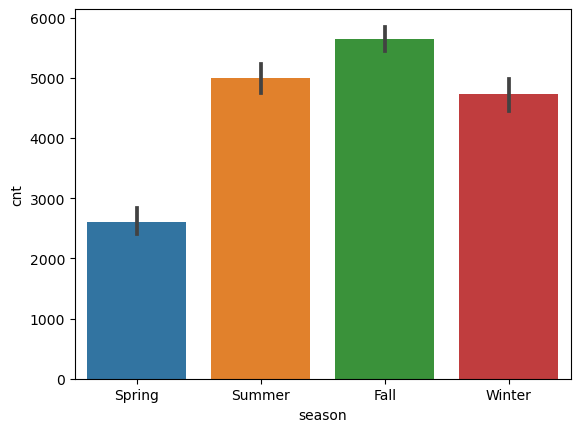

In [205]:
# Between season (1:spring, 2:summer, 3:fall, 4:winter) and count
sns.barplot(data=sh_bike, x='season',y='cnt')
plt.show()

In [ ]:
#### Bike rentals are highest during the Fall season
#### Let's Check Weather Vs Count

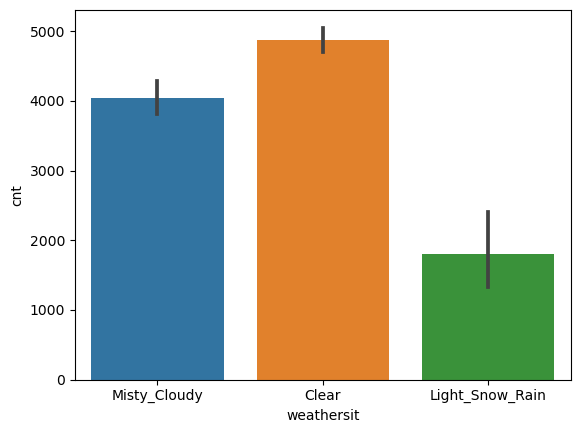

In [165]:
sns.barplot(data=sh_bike, x='weathersit',y='cnt')
plt.show()

#### Bike Rentals was more during Clear or partly cloudy weather
#### Month Vs Count

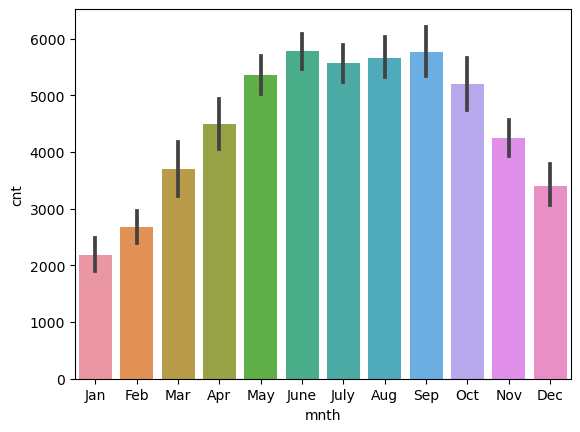

In [206]:
sns.barplot(data=sh_bike, x='mnth',y='cnt')
plt.show()

#### summer months got higher count
#### Days of the week Vs Count

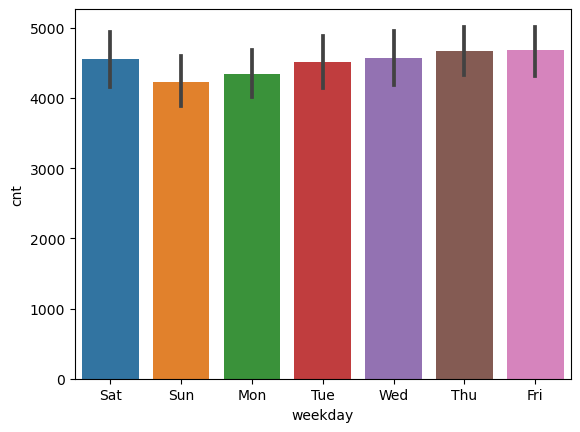

In [207]:
sns.barplot(data=sh_bike, x='weekday',y='cnt')
plt.show()

#### Wednesday > Thursday > Friday higher count so higher rental

### Analysing correlation through Heatmap

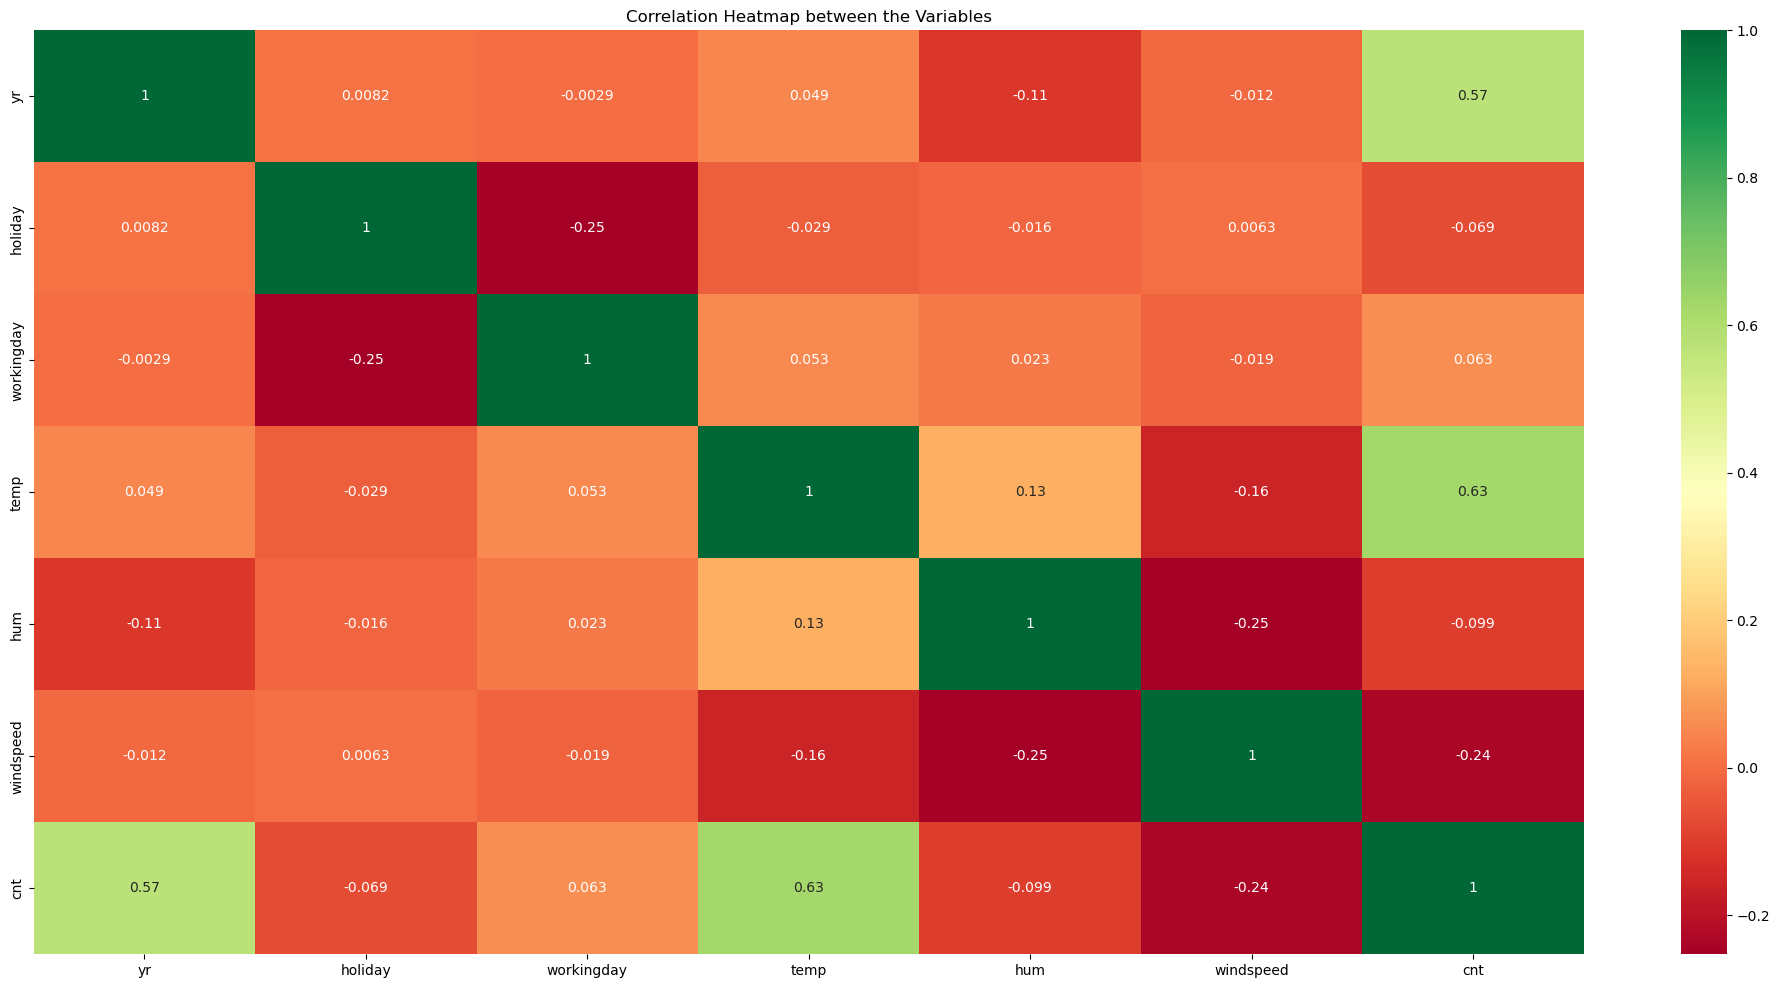

In [208]:
#Heatmap between the variables
plt.figure(figsize=(25, 12))
sns.heatmap(sh_bike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation Heatmap between the Variables")
plt.show()

#### Some of the variables are showing good correlation and can used in building a LR model

# Data Preparation For Data Modelling

In [215]:
#### Create Dummy Variables
months_dc=pd.get_dummies(sh_bike.mnth,drop_first=True)
weekdays_dc=pd.get_dummies(sh_bike.weekday,drop_first=True)
weathersit_dc=pd.get_dummies(sh_bike.weathersit,drop_first=True)
seasons_dc=pd.get_dummies(sh_bike.season,drop_first=True)

In [216]:
# Adding Dummy Column results to the original dataframe
sh_bike_dc = pd.concat([sh_bike,months_dc,weekdays_dc,weathersit_dc,seasons_dc],axis=1)

In [219]:
sh_bike_dc.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Misty_Cloudy,Spring,Summer,Winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [218]:
# drop coloum 'season','mnth','weekday','weathersit' we have dummy column w.r.t each column.
sh_bike_dc.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
sh_bike_dc.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Misty_Cloudy,Spring,Summer,Winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [220]:
sh_bike_dc.shape

(730, 29)

In [177]:
sh_bike_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   Aug              730 non-null    uint8  
 8   Dec              730 non-null    uint8  
 9   Feb              730 non-null    uint8  
 10  Jan              730 non-null    uint8  
 11  July             730 non-null    uint8  
 12  June             730 non-null    uint8  
 13  Mar              730 non-null    uint8  
 14  May              730 non-null    uint8  
 15  Nov              730 non-null    uint8  
 16  Oct              730 non-null    uint8  
 17  Sep             

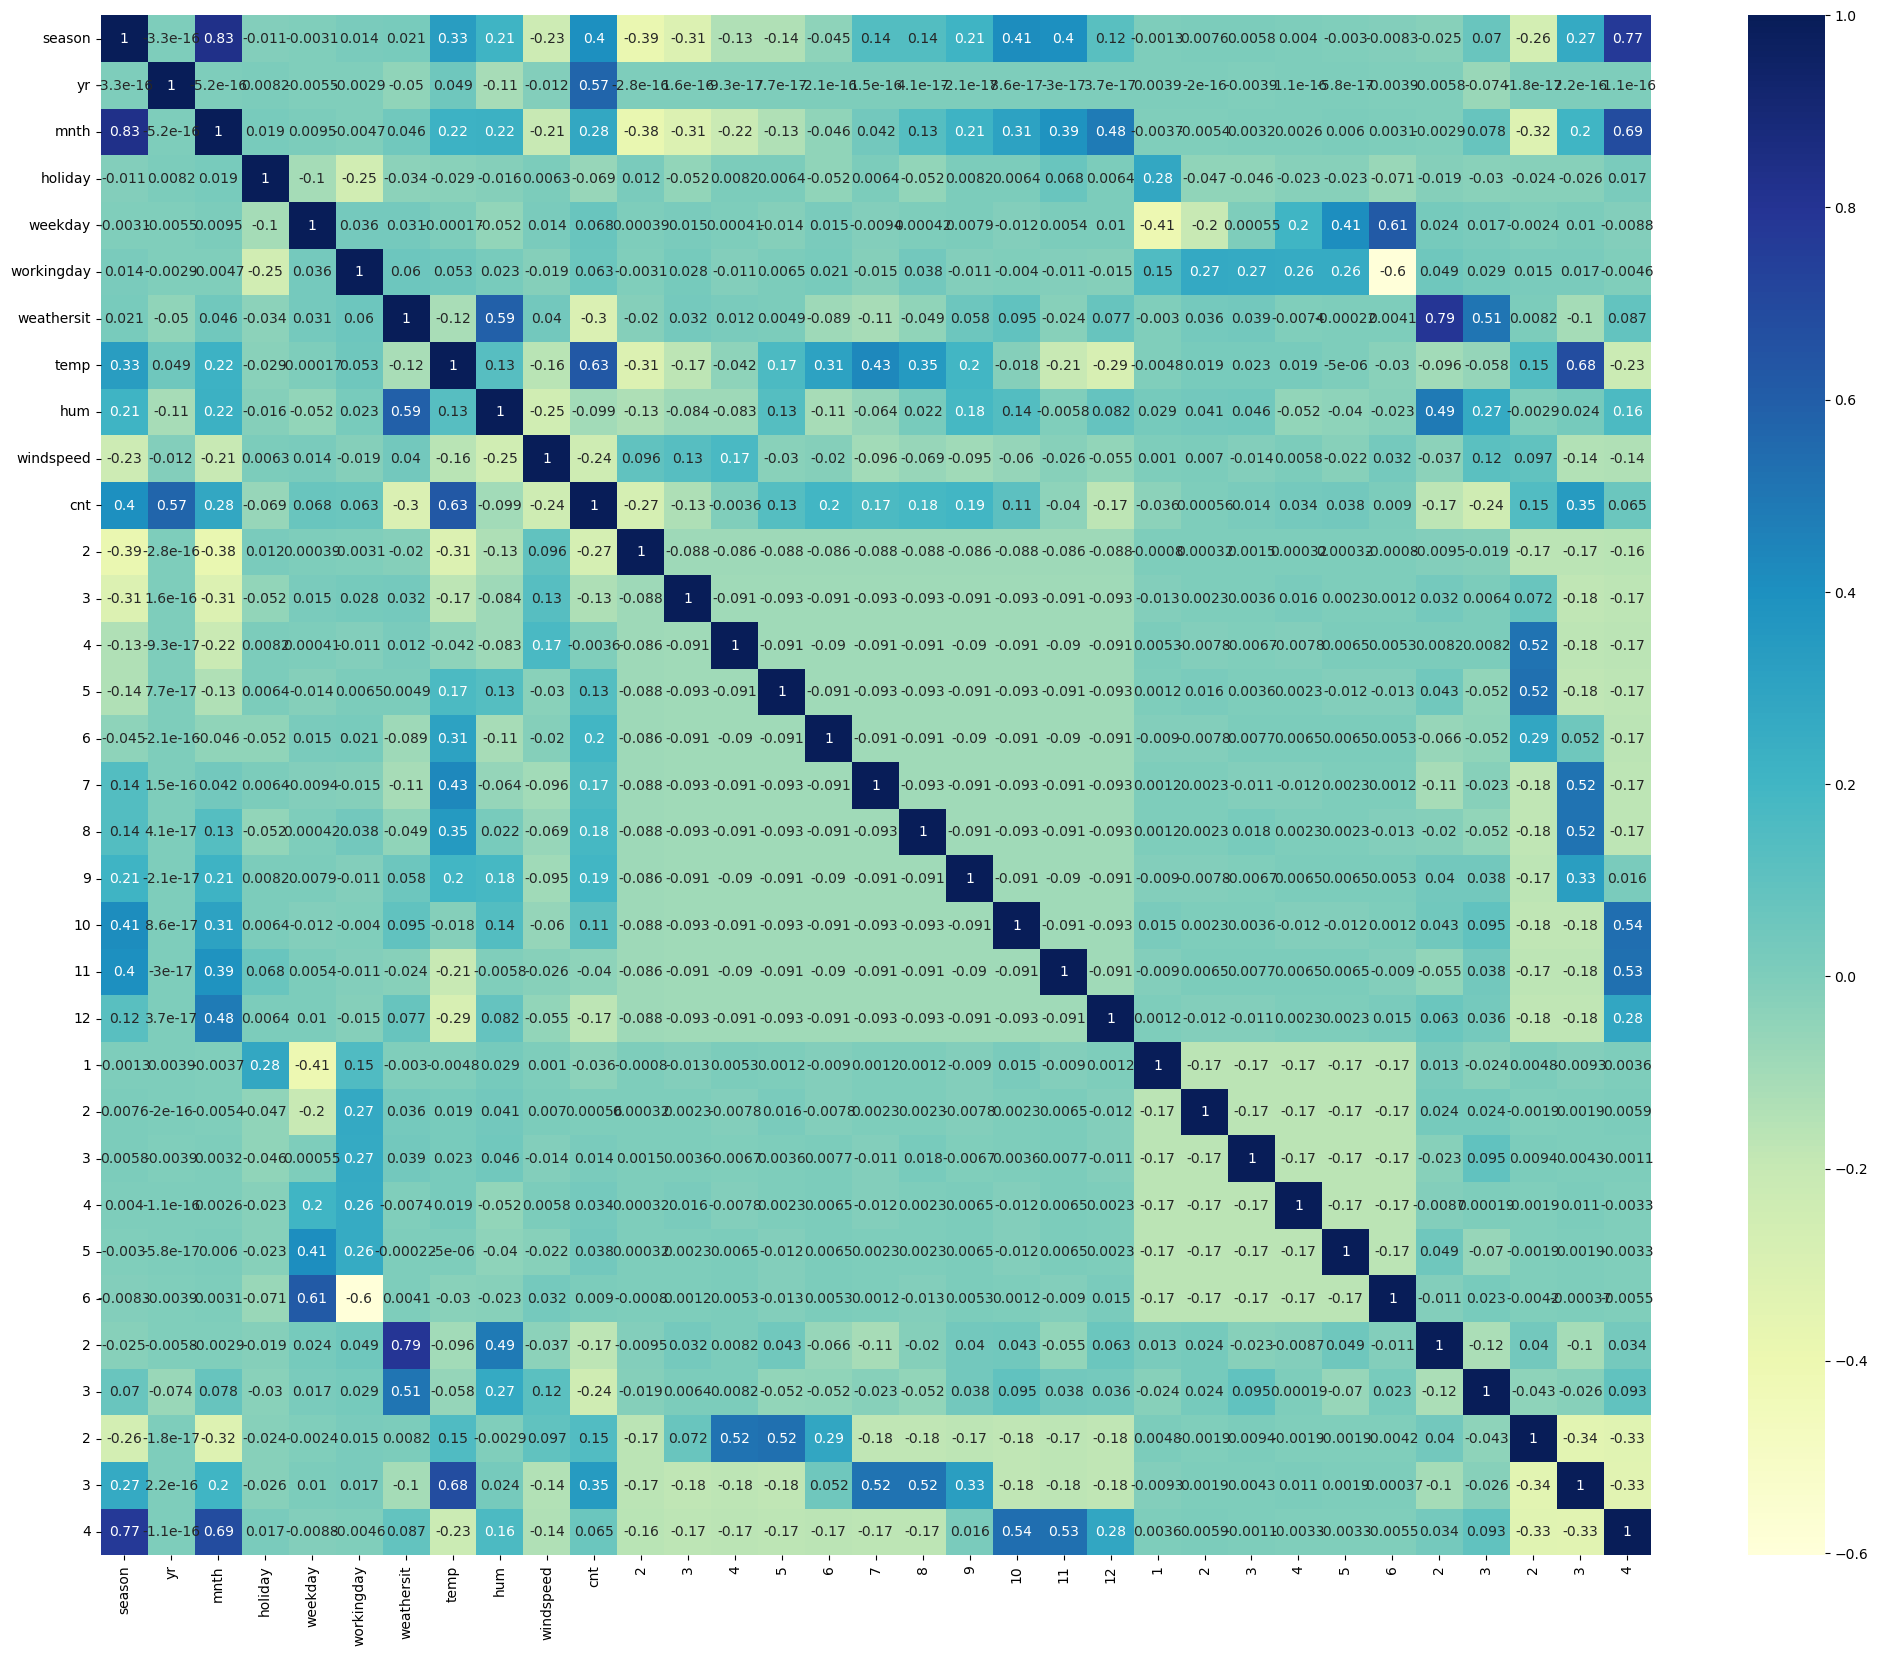

In [223]:
#lets check the correlation between variables again after the encoding
plt.figure(figsize=(25, 20))
sns.heatmap(df_new.corr(), cmap='YlGnBu', annot = True)
plt.show()

# Split the Data into Train and Test Sets

In [299]:
import sklearn 
from sklearn.model_selection import train_test_split

In [300]:
np.random.seed(0)
df_trn,df_test=train_test_split(sh_bike_dc,train_size=0.7,random_state=100)

In [301]:
df_trn.shape

(510, 29)

In [302]:
df_test.shape

(220, 29)

# Rescaling
#### Feature scaling is a method used to normalize the range of independent variables or features of data. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

#### Min-Max scaling (Normalisation):Between 0 and 1

#### Standardisation :mean-0, sigma-1

In [303]:
from sklearn.preprocessing import MinMaxScaler

In [304]:
mmsc=MinMaxScaler()
df_trn[num_vars]=mmsc.fit_transform(df_trn[num_vars])
df_trn.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Misty_Cloudy,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [256]:
df_trn.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Misty_Cloudy,Spring,Summer,Winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [305]:
# Checking the numeric variables(min and max) after scaling
df_trn.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Misty_Cloudy,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Above shows that all variables are between 0 and 1

## Modelling and Feature selection

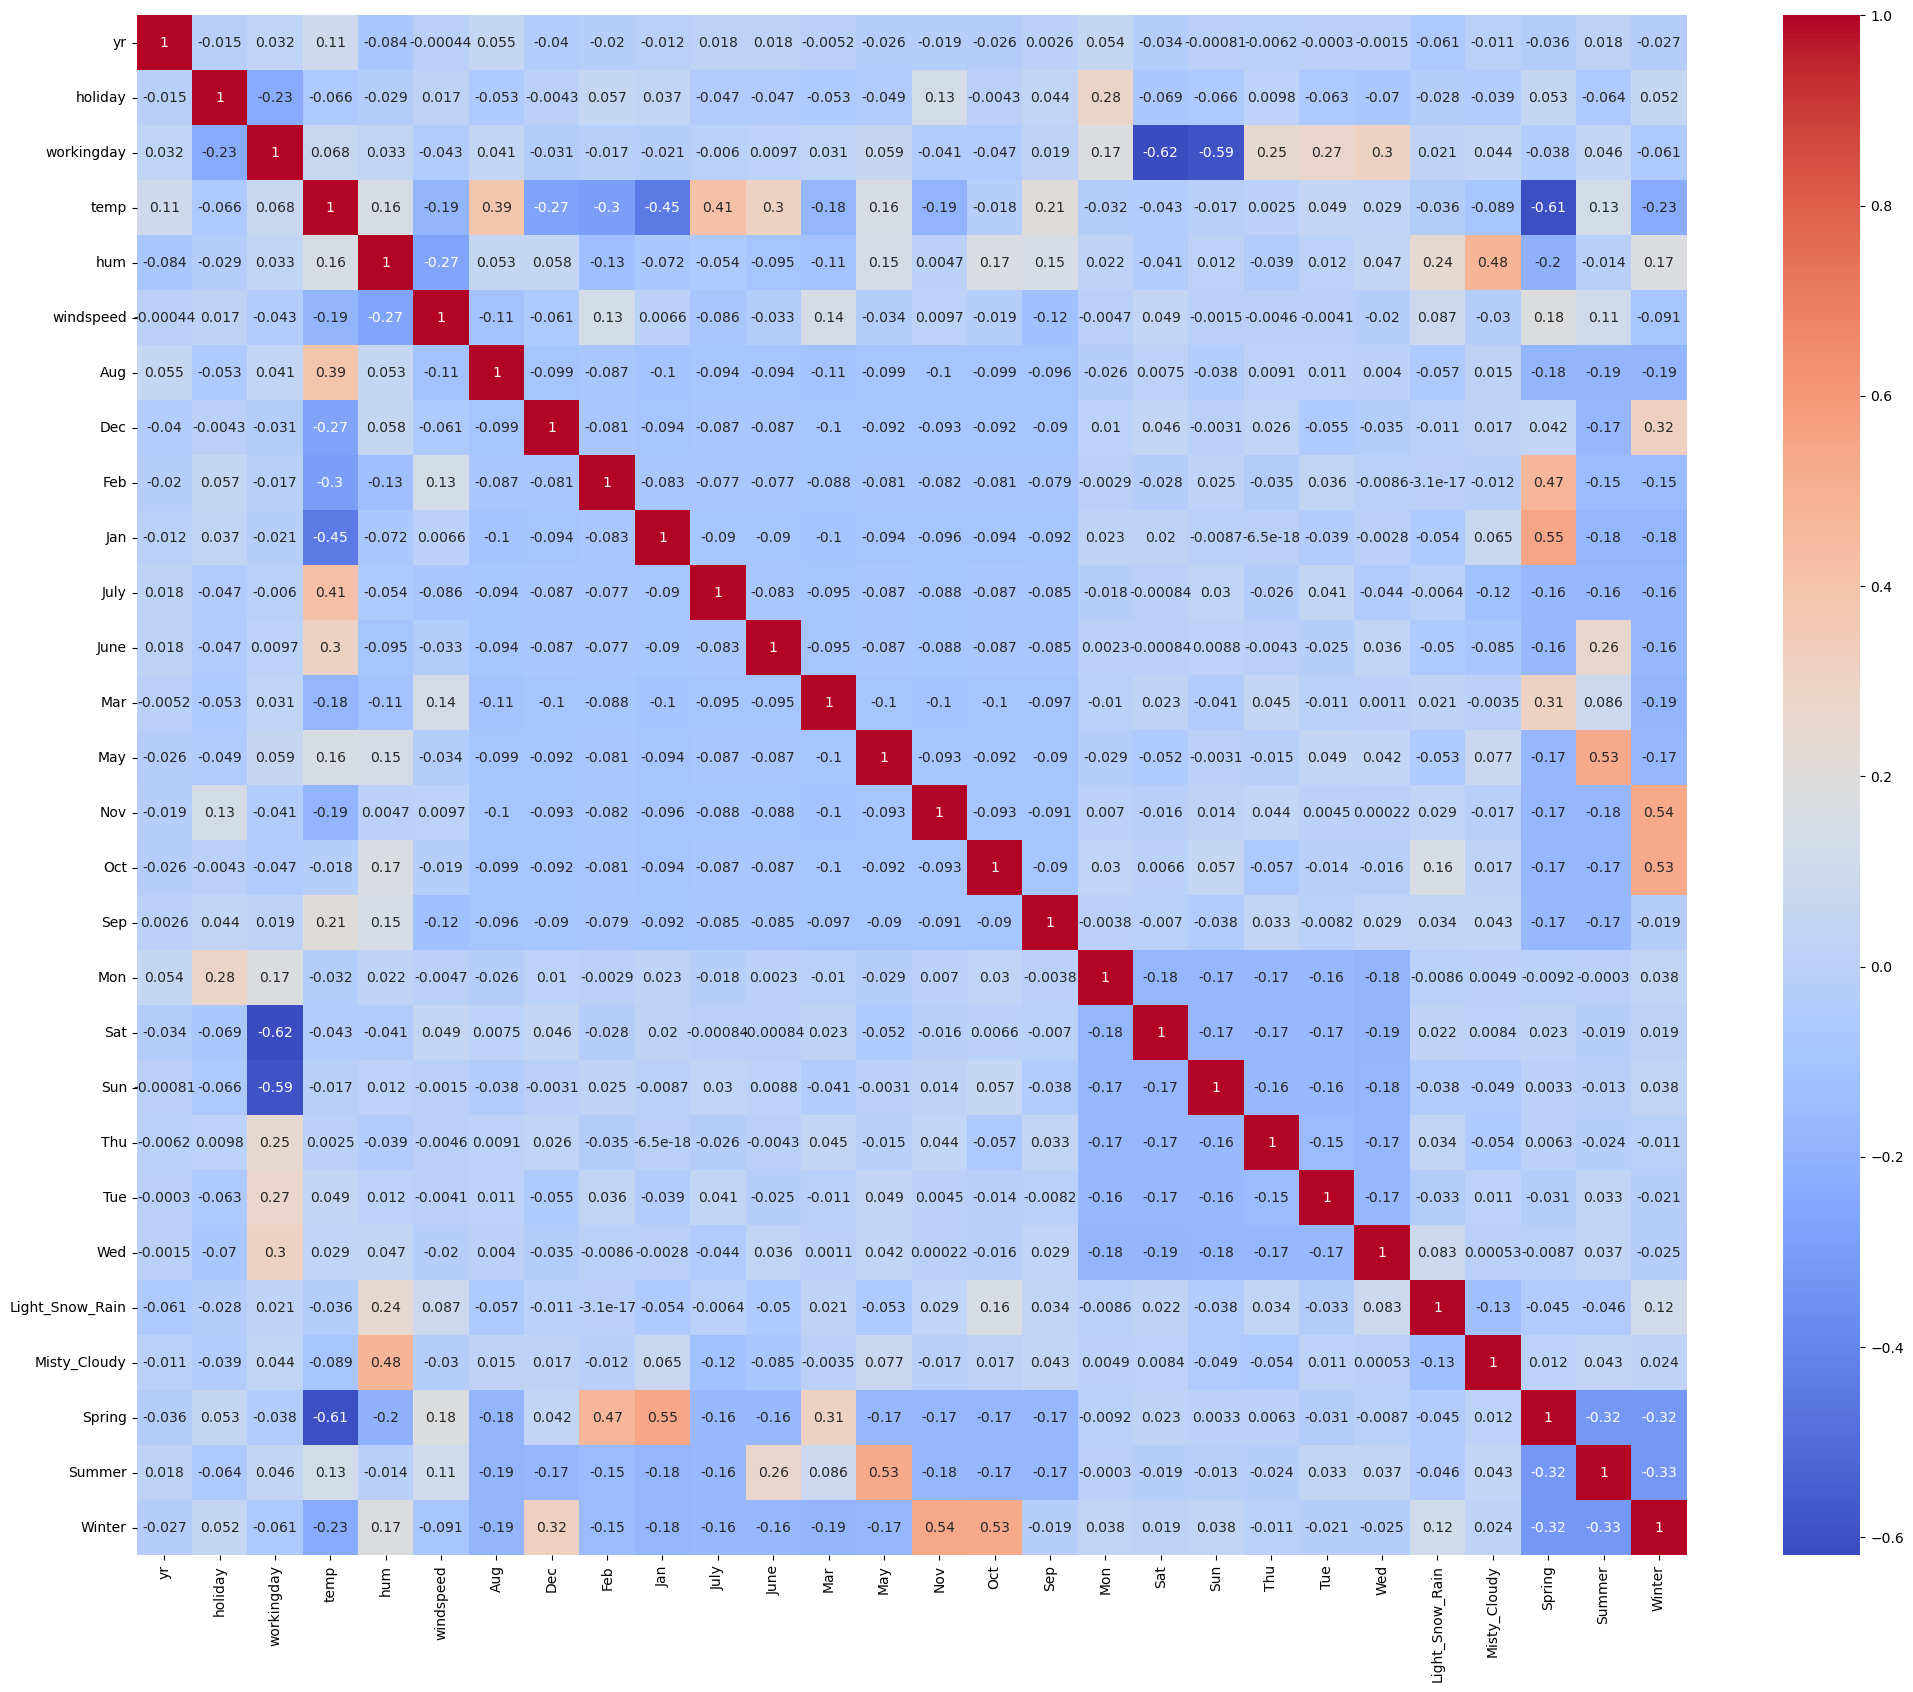

In [306]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(df_train.corr(),cmap='coolwarm',annot = True)
plt.show()

#### temp and year are correlated in above Heatmap to the 'count' variable. the summer months (June, July, Aug and Sept) also show high correlation.

### Splitting into X_train and y_train

In [307]:
# Divide the data into X and y
y_trn=df_trn.pop("cnt")
X_trn=df_trn

### Selecting features using RFE

In [308]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [309]:
# Running RFE for 15 output variable
lm = LinearRegression()
lm.fit(X_trn, y_trn)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_trn, y_trn)

In [420]:
#List of variables selected
list(zip(X_trn.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light_Snow_Rain', True, 1),
 ('Misty_Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [421]:
#Columns where RFE support is True
col = X_trn.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light_Snow_Rain', 'Misty_Cloudy', 'Spring',
       'Summer', 'Winter'],
      dtype='object')

In [422]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

## Data Modeling using statsmodel, for the detailed statistics

In [435]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [436]:
# Creating X_test dataframe with RFE selected variables
X_trn_rfe = X_trn[col]

In [437]:
# Adding a constant variable 
X_trn_rfe = sm.add_constant(X_trn_rfe)

In [438]:
# Running the linear model 
ln_mod = sm.OLS(y_trn,X_trn_rfe).fit()

In [439]:
print(ln_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          4.22e-191
Time:                        21:29:36   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036     

In [440]:
#Dropping the constant
X_trn_rfe = X_trn_rfe.drop(['const'], axis=1)

In [441]:
# Calculating the VIFs for our model
vif = pd.DataFrame()
X = X_trn_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,Spring,4.53
14,Winter,3.46
13,Summer,2.85
11,Misty_Cloudy,2.29
0,yr,2.09
9,Sat,1.98


### Jan is insignificant due to high p-value and low VIF; can be dropped

In [443]:
#Dropping Jan
X_trn_new1 = X_trn_rfe.drop(["Jan"], axis = 1)

### Rebuild the model

In [444]:
X_trn_lm1 = sm.add_constant(X_trn_new1)
lm1 = sm.OLS(y_trn,X_trn_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          2.11e-191
Time:                        21:30:39   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2402      0.036     

In [445]:
#Drop the constant
X_trn_lm1 = X_trn_lm1.drop(['const'], axis=1)

In [446]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_trn_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
11,Spring,4.24
13,Winter,3.42
12,Summer,2.85
10,Misty_Cloudy,2.29
0,yr,2.08
8,Sat,1.97


### 'hum' can be dropped as very high VIF

In [447]:
#Drop hum
X_trn_new2 = X_trn_lm1.drop(["hum"], axis = 1)

In [448]:
#Rebuild the model
X_trn_lm2 = sm.add_constant(X_trn_new2)
lm2 = sm.OLS(y_trn,X_trn_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.28e-188
Time:                        21:31:15   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1576      0.031     

In [449]:
#Drop the constant
X_trn_lm2=X_trn_lm2.drop(['const'],axis=1)

In [451]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_trn_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,Spring,2.49
11,Summer,2.34
0,yr,2.07
12,Winter,1.98
7,Sat,1.96
5,July,1.58
9,Misty_Cloudy,1.57


### holiday variable seems to be insignificant, by looking at p value. We can drop it

In [452]:
#Drop the Hoiday column
X_trn_new3=X_trn_lm2.drop(['holiday'],axis=1)

In [453]:
# Adding a constant variable 
X_trn_lm3 = sm.add_constant(X_trn_new3)
lm3 = sm.OLS(y_trn,X_trn_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          7.12e-189
Time:                        21:32:13   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1492      0.031     

In [454]:
#Drop constant 
X_trn_lm3=X_trn_lm3.drop(['const'],axis=1)

In [455]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_trn_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,Spring,2.38
10,Summer,2.32
0,yr,2.07
11,Winter,1.91
6,Sat,1.83
4,July,1.58
8,Misty_Cloudy,1.57


### July variable seems to be insignificant, by looking at p value. We can drop it too

In [456]:
#Drop the July column
X_trn_new4=X_trn_lm3.drop(['July'],axis=1)

In [457]:
# Rebuild the model
X_trn_lm4 = sm.add_constant(X_trn_new4)
lm4 = sm.OLS(y_trn,X_trn_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.42e-188
Time:                        21:38:31   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1406      0.031     

In [458]:
#Drop constant
X_trn_lm4= X_trn_lm4.drop(['const'], axis=1)

In [459]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_trn_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,Spring,2.30
0,yr,2.07
9,Summer,2.00
5,Sat,1.83
10,Winter,1.76
7,Misty_Cloudy,1.57
4,Sep,1.23


### Spring column can be dropped due to its p value and low VIF

In [461]:
#Drop Spring
X_trn_new5=X_trn_lm4.drop(['Spring'], axis=1)

In [462]:
#Build the model
X_trn_lm5= sm.add_constant(X_trn_new5)
lm5=sm.OLS(y_trn,X_trn_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          3.13e-188
Time:                        21:47:51   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019     

In [463]:
#Drop the constant
X_trn_lm6=X_trn_lm5.drop(['const'],axis=1)

In [464]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_trn_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
5,Sat,1.69
8,Summer,1.57
7,Misty_Cloudy,1.53
9,Winter,1.40
4,Sep,1.20
6,Light_Snow_Rain,1.08


### The VIFs and p-values both are within an acceptable range. So we are good to make our predictions using this model.

#### - All p-value are (< 0.05).
#### - All VIF is < 5
#### - R-square value of 0.833 or 83.3%
#### - The adjusted R-squared is 0.829 or 82.9%

# Residual Analysis of the train data

#### We will plot a histogram of the error terms to check if the error terms are also normally distributed (one of the main assumptions of linear regression)

In [467]:
X_trn_lm5

,const,yr,workingday,temp,windspeed,Sep,Sat,Light_Snow_Rain,Misty_Cloudy,Summer,Winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,1,1,0


In [468]:
#y train pred
y_trn_pred = lm5.predict(X_trn_lm5)

In [469]:
# Importing the libraries.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 640x480 with 0 Axes>

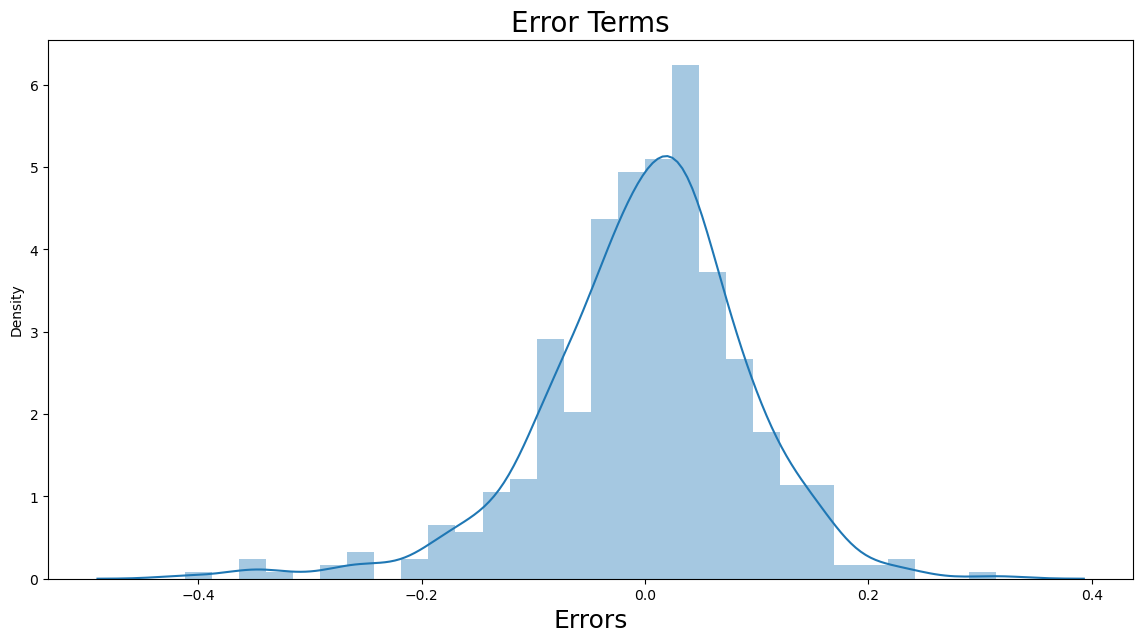

In [471]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_trn - y_trn_pred), bins = 30)
plt.title('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

#### We observe that the error terms are normally distributed

## Make Predictions

#### Applying the scale on test sets

In [472]:
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Misty_Cloudy,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [474]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Misty_Cloudy,Spring,Summer,Winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [475]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Misty_Cloudy,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.059091,0.086364,0.100000,0.077273,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.236333,0.281541,0.300684,0.267633,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [476]:
X_trn_new5.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'Sep', 'Sat',
       'Light_Snow_Rain', 'Misty_Cloudy', 'Summer', 'Winter'],
      dtype='object')

In [477]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_trn_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,yr,workingday,temp,windspeed,Sep,Sat,Light_Snow_Rain,Misty_Cloudy,Summer,Winter
184,1.0,0,0,0.831783,0.084219,0,0,0,1,0,0
535,1.0,1,1,0.901354,0.153728,0,0,0,0,1,0
299,1.0,0,1,0.511964,0.334206,0,0,0,1,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,0,0,0,0,1,0


In [478]:
#Make predictions
y_pred = lm5.predict(X_test_new1)

In [479]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7961390438459764

In [480]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8038195)*(11-1)/(11-1-1)
print(Adj_r2)

0.7820216666666667


Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

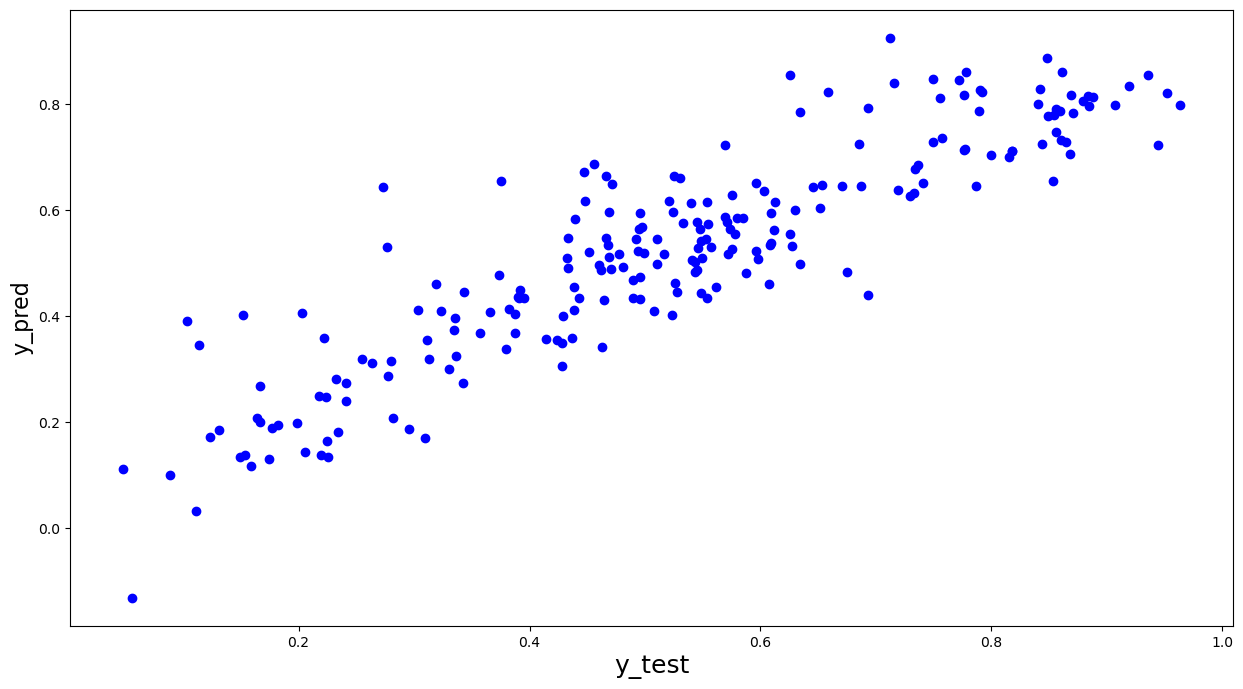

In [481]:
# Plotting y_test and y_pred
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

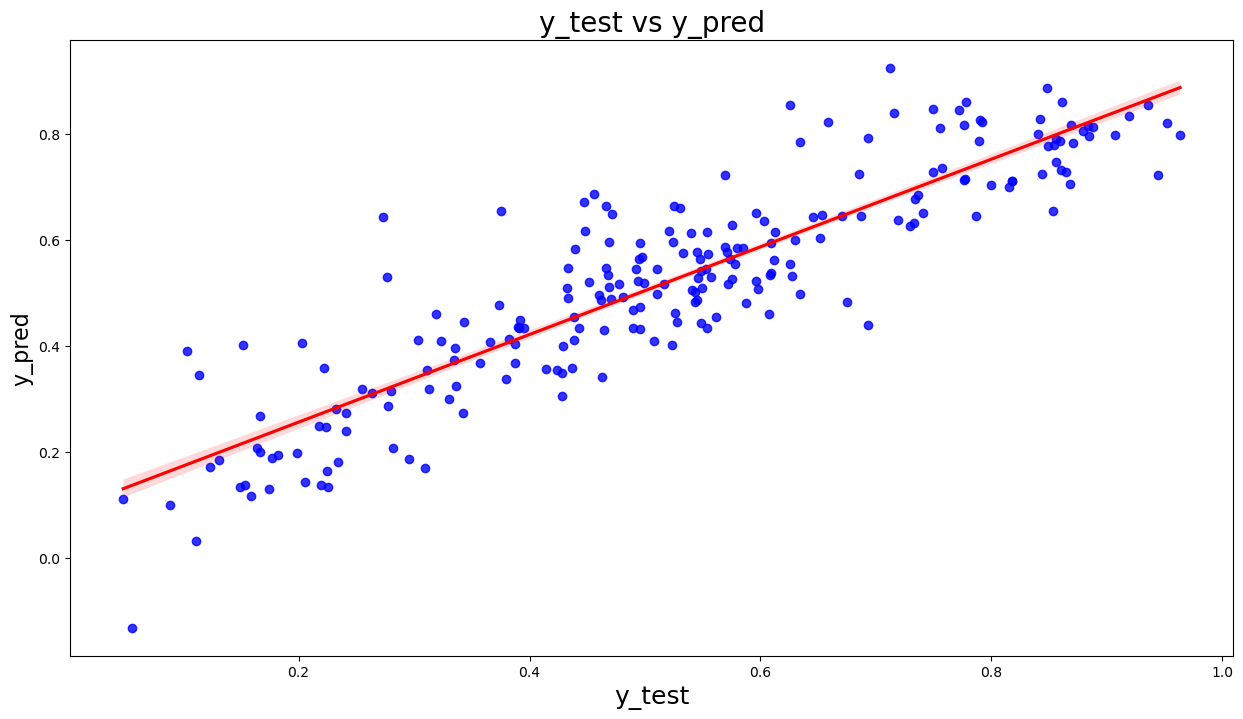

In [482]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

### The equation of our best fitted line is:
#### cnt = (0.4777×temp) + (0.0910×Sep) + (0.0621×summer) + (0.0945×winter) + (0.2341×yr) + (−0.2850×Light_Snow_Rain) + (−0.0786×Misty_Cloudy) + (-0.0554×spring) + (-0.1481×windspeed) + (-0.0963×holiday)

# Comparison between Train model and Test:
#### - Train R^2 			: 0.833
#### - Train Adjusted R^2 	: 0.829
#### - Test R^2				: 0.804
#### - Test Adjusted R^2		: 0.782
#### - Difference in R^2 between train and test: 2.9%
#### - Difference in adjusted R^2 between Train and test: 4.7% which is less than 5%

# Conclusion:

#### With the above excercise we have a decent model for the the demand for shared bikes with the significant variables.
#### We observe that temperature variable is having the highest coefficient 0.4777, which means if the temperature increases by one unit the number of bike rentals increases by 0.4777 units.
#### Similary we can see coefficients of other variables in the equation for best fitted line.
#### We also observe variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

### Hence we conclude that we have a best model here!

# Suggestion to Business:
#### - BoomBikes can focus more on Temperature
#### - We observed that demand for bikes was more in 2019 than 2018 which shows progress in rentals but the company might be facing dips in rentals and hence their revenues due to the ongoing Corona pandemic. This may improve as the situation on covid gets better.
#### - Can focus more on Summer & Winter season. September month also shows positive co-relation on bike rentals.
#### - We observed that spring season, holidays, adverse climate has negative co-relation. The company can come up with some offers to increase the demand.